In [ ]:
#Romain Mathurin

In [ ]:
# Import librairies
import pandas as pd
import numpy as np

In [ ]:
# Upload du fichier
from google.colab import files
uploaded = files.upload()

Saving vispremv.dat to vispremv.dat


In [ ]:
# import du fichier et présentation des 5 premières lignes
data=pd.read_table("vispremv.dat",sep="\s+")
data.head()

SEXEQ FAMIQ PCSPQ kvunbq  ...     ITAVCL     HAVEFL    JNBJDL CARVP
148009  Shom  Fcou  Pint     K1  ...  14.080718  13.230263  0.693147  Coui
552427  Shom  Fcou  Pint     K0  ...  11.717872   0.000000  0.000000  Coui
556005  Shom  Fseu  Psan     K0  ...  11.329303   0.000000  0.000000  Coui
556686  Shom  Fseu  Pouv     K0  ...  13.111856   9.972267  2.772589  Coui
642680  Shom  Fcou  Pint     K0  ...  11.304904   0.000000  1.386294  Coui

[5 rows x 54 columns]

In [ ]:
data.describe()

In [ ]:
data_reduit = data[['SEXEQ', 'FAMIQ', 'PCSPQ', 'RELAT', 'AGER', 
              'OPGNBL', 'MOYRVL', 'TAVEPL', 'ENDETL', 'GAGETL', 
              'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY', 'QCREDL', 
              'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 
              'VIEMTL', 'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 
              'YLVMTL', 'ROCNB', 'NPTAG', 'ITAVCL', 'HAVEFL', 'JNBJDL', 'CARVP']]
print(data_reduit)

In [ ]:
print('SEXE : ')
print(data_reduit['SEXEQ'].value_counts(normalize=True))
print('FAMILLE : ')
print(data_reduit['FAMIQ'].value_counts(normalize=True))
print('CSP : ')
print(data_reduit['PCSPQ'].value_counts(normalize=True))

data_reduit['AGER'].hist()

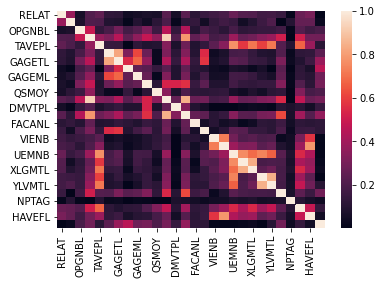

In [ ]:
import seaborn as sns
sns.heatmap(np.abs(data_reduit.iloc[:,0:33].corr()));


In [ ]:
from sklearn.preprocessing import OneHotEncoder

data_reduit=data.drop(columns=[ "kvunbq","vienbq","uemnbq","xlgnbq","ylvnbq","rocnbq","nptagq",
                    "endetq","gagetq","facanq","lgagtq","havefq","jnbjdq","ageq","relatq","qsmoyq",
                    "opgnbq","moyrvq","tavepq","dmvtpq","boppnq","itavcq"])
        
data_reduit_with_dummies = pd.get_dummies(data_reduit, drop_first=True,sparse=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["SEXEQ", "FAMIQ", "PCSPQ", "CARVP"]

numerical_scaler = StandardScaler()
numerical_cols = ['RELAT', 'AGER', 'OPGNBL', 'MOYRVL', 'TAVEPL', 'ENDETL', 'GAGETL', 
                  'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY', 'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 
                  'VIEMTL', 'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG', 'ITAVCL', 'HAVEFL', 'JNBJDL']



preprocessor = make_column_transformer(
    (categorical_encoder, categorical_cols),
    (numerical_scaler, numerical_cols)
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
X = data_reduit_with_dummies.drop(columns=['CARVP_Coui'])
pca = PCA(n_components=2)
pca.fit(X)
Xpca=pca.transform(X)
#plt.scatter(Xpca[:, 0], Xpca[:, 1])

sns.scatterplot(data=Xpca, palette='viridis')


array([[ 2.53088985e+04,  9.98604871e+01],
       [-9.29312733e+03,  9.34294891e+00],
       [ 1.59186125e+03, -3.44952231e+01],
       ...,
       [-7.91815466e+03, -9.89855616e+01],
       [-9.00711566e+03,  6.07861315e+01],
       [-1.06291297e+04,  6.49766001e+00]])

In [ ]:
from sklearn.cluster import KMeans
Xpca=pca.transform(X)
y_kmeans = data_reduit_with_dummies["CARVP_Coui"]
kmeans = KMeans(n_clusters=2, random_state=0).fit(Xpca)
kmeans.fit(Xpca)
centers = kmeans.cluster_centers_
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y_kmeans)

In [ ]:
#Création jeu train/test
from sklearn.model_selection import train_test_split
x=data_reduit_with_dummies.drop(columns=['CARVP_Coui'])
y=data_reduit_with_dummies['CARVP_Coui']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

#On conserve uniquement les variables gardé par Lasso
xTrain_red = xTrain[['MOYRVL','SEXEQ_Shom','PCSPQ_Pint','PCSPQ_Psan']]
xTest_red = xTest[['MOYRVL','SEXEQ_Shom','PCSPQ_Pint','PCSPQ_Psan']]



In [ ]:
#Standardiser
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)


scaler2 = StandardScaler()
scaler2.fit(xTrain_red)
xTrain_red=scaler2.transform(xTrain_red)



In [ ]:
#RegressionLogistique
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#Modele logistic
clf = LogisticRegression(random_state=0).fit(xTrain, yTrain)
#Modele Logistique avec uniquement les variables conservé par lasso
clf_logistic = LogisticRegression(random_state=0).fit(xTrain_red, yTrain)

#Modele lasso
clf_lasso = Lasso(alpha=0.1,random_state=0).fit(xTrain, yTrain)
#Modele SVM
clf_SVC = SVC(gamma='auto',random_state=0,probability=True).fit(xTrain, yTrain)
#Modele XGBoost
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(xTrain, yTrain)


In [ ]:
from sklearn import metrics
#Prédiction
print(clf.score(scaler.transform(xTest), yTest))
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTest+1, clf.predict(scaler.transform(xTest)), pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)
#Prédiction
print(clf_logistic.score(scaler2.transform(xTest_red), yTest))
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTest+1, clf_logistic.predict(scaler2.transform(xTest_red)), pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)
#Bon moins bon que lasso



0.8450704225352113
Gini :  0.6130977130977131
0.7793427230046949
Gini :  0.44948024948024967


In [ ]:
#Print coefficient et variables
coef_table = pd.DataFrame(list(x.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",clf.coef_.transpose())
coef_table

In [ ]:
from sklearn import metrics
#Prédiction
print(clf_lasso.score(scaler.transform(xTest), yTest))
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTest+1, clf_lasso.predict(scaler.transform(xTest)), pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)




0.1871653634787718
Gini :  0.6637214137214136


In [ ]:
#Print coefficient et variables restantes
coef_table = pd.DataFrame(list(x.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",clf_lasso.coef_.transpose())
coef_table[coef_table["Coefs"] != 0]

0     Coefs
3       MOYRVL  0.097306
28  SEXEQ_Shom  0.027664
31  PCSPQ_Pint  0.019036
33  PCSPQ_Psan -0.004058

In [ ]:
from sklearn import metrics
#Prédiction
print(clf_SVC.score(scaler.transform(xTest), yTest))
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTest+1, clf_SVC.predict(scaler.transform(xTest)), pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)
f1_score(yTest, clf_SVC.predict(scaler.transform(xTest)))


0.8591549295774648
Gini :  0.6506237006237008


0.7619047619047619

In [ ]:
from sklearn import metrics
#Prédiction
print(clf_GBC.score(scaler.transform(xTest), yTest))
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTest+1, clf_GBC.predict_proba(scaler.transform(xTest))[:, 1], pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)
metrics.auc(fpr, tpr)

0.8967136150234741
Gini :  0.8817047817047818


0.9408523908523909

In [ ]:
#Tentative de GridSearch sur lasso
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':np.arange(0.01,0.4,0.05)}
cls_logistic = LogisticRegression( )
cls_logistic_GS = GridSearchCV(cls_logistic, parameters)
cls_logistic_GS.fit(xTrain, yTrain)



In [ ]:
print(cls_logistic_GS.best_estimator_.coef_)
print(clf.coef_)


[[-0.57683778  0.14509777  0.39238811  0.6824725  -0.12956145 -0.49601835
   0.03285493  0.37984441  0.30032416  0.47095658  0.13479441  0.45096858
  -0.25851923 -1.04451786  0.21519585  0.23105123 -0.22692485 -0.05500762
   0.50593911 -0.49519176  0.32964534 -0.18355278 -0.29164201  0.4077789
  -0.44219172  0.19181136  0.45483505  0.17536359  0.64024769  0.09528605
  -0.21793636 -0.21182814 -0.61786602 -0.95721473]]
[[-0.62557528  0.13721142  0.42144417  0.68186152 -0.16903237 -0.53742034
  -0.01336088  0.41805832  0.33312071  0.54092867  0.13222885  0.62581322
  -0.27686682 -1.29481669  0.24745691  0.26750621 -0.26376787 -0.06514736
   1.01495863 -0.88882232  0.42728881 -0.42155916 -0.35472376  0.48123187
  -0.47870804  0.21096284  0.49850187  0.19009298  0.67560765  0.08435266
  -0.5439696  -0.62001134 -1.02300851 -1.40805753]]


In [ ]:
#Tentative de GridSearch sur xgboost
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':np.arange(10,1000,50),
              'learning_rate':[0.05,0.1, 0.5,1],
              'max_depth':[1,2,3]}
GBC = GradientBoostingClassifier()
GBC_GS = GridSearchCV(GBC, parameters)
GBC_GS.fit(xTrain, yTrain)
sorted(GBC_GS.cv_results_.keys())




In [ ]:
GBC_GS.best_scor
#Print coefficient et variables restantes
coef_table = pd.DataFrame(list(x.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",GBC_GS.coef_.transpose())
coef_table[coef_table["Coefs"] != 0]

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 560}

Gini :  0.9738118034074728
Gini :  0.887110187110187


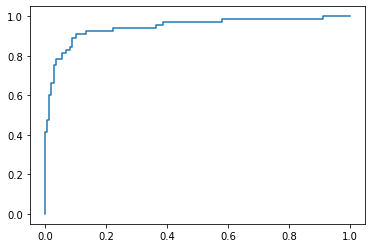

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTrain+1, GBC_GS.predict_proba(xTrain)[:, 1], pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)
#Auc Metric
fpr, tpr, thresholds = metrics.roc_curve(yTest+1, GBC_GS.predict_proba(scaler.transform(xTest))[:, 1], pos_label=2)
print("Gini : ", 2*(metrics.auc(fpr, tpr))-1)

plt.plot(fpr, tpr) 

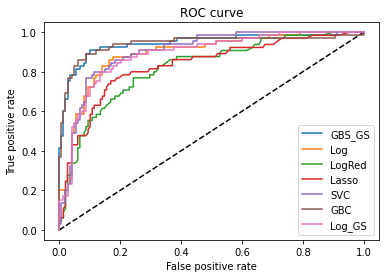

In [ ]:
from sklearn import metrics

# The gradient boosted model by itself
y_pred_GBC_GS = GBC_GS.predict_proba(scaler.transform(xTest))[:, 1]
fpr_GBC_GS, tpr_GBC_GS, _ = metrics.roc_curve(yTest, y_pred_GBC_GS)
# The clf_logistic model by itself
y_pred_clf = clf.predict_proba(scaler.transform(xTest))[:, 1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(yTest, y_pred_clf)
# The clf_logistic model by itself
y_pred_clf_logistic = clf_logistic.predict_proba(scaler2.transform(xTest_red))[:, 1]
fpr_clf_logistic, tpr_clf_logistic, _ = metrics.roc_curve(yTest, y_pred_clf_logistic)

# The clf_lasso model by itself
y_pred_clf_lasso = clf_lasso.predict(scaler.transform(xTest))
fpr_clf_lasso, tpr_clf_lasso, _ = metrics.roc_curve(yTest, y_pred_clf_lasso)

# The clf_SVC boosted model by itself
y_pred_clf_SVC = clf_SVC.predict_proba(scaler.transform(xTest))[:, 1]
fpr_clf_SVC, tpr_clf_SVC, _ = metrics.roc_curve(yTest, y_pred_clf_SVC)

# The clf_GBC boosted model by itself
y_pred_clf_GBC = clf_GBC.predict_proba(scaler.transform(xTest))[:, 1]
fpr_clf_GBC, tpr_clf_GBC, _ = metrics.roc_curve(yTest, y_pred_clf_GBC)
# The cls_logistic_GS boosted model by itself
y_pred_cls_logistic_GS = cls_logistic_GS.predict_proba(scaler.transform(xTest))[:, 1]
fpr_cls_logistic_GS, tpr_cls_logistic_GS, _ = metrics.roc_curve(yTest, y_pred_cls_logistic_GS)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_GBC_GS, tpr_GBC_GS, label='GBS_GS')
plt.plot(fpr_clf, tpr_clf, label='Log')
plt.plot(fpr_clf_logistic, tpr_clf_logistic, label='LogRed')
plt.plot(fpr_clf_lasso, tpr_clf_lasso, label='Lasso')
plt.plot(fpr_clf_SVC, tpr_clf_SVC, label='SVC')
plt.plot(fpr_clf_GBC, tpr_clf_GBC, label='GBC')
plt.plot(fpr_cls_logistic_GS, tpr_cls_logistic_GS, label='Log_GS')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
# The gradient boosted model by itself
y_pred_GBC_GS = GBC_GS.predict_proba(scaler.transform(xTest))[:, 1]
#fpr_GBC_GS, tpr_GBC_GS, _ = metrics.roc_curve(yTest, y_pred_GBC_GS)
y_pred_GBC_GS

In [ ]:
from sklearn.metrics import f1_score

f1_score(yTrain, GBC_GS.predict(xTrain))
#print(GBC_GS.score(scaler.transform(xTest), yTest))
bar(GBC_GS.predict_proba(xTrain)

SyntaxError: ignored

In [ ]:
table = pd.crosstab(GBC_GS.predict(scaler.transform(xTest)), yTest)
print(table)

CARVP_Coui    0   1
row_0              
0           140  12
1             8  53
